# **ML Assignment-2**

Atharva Chikhale         2021A7PS2752H

Chinni Vamshi Krushna    2021A7PS2084H

Rishabh Mittal           2021A7PS2620H

In [ ]:
!pip install tensorflow_decision_forests
!pip install tf_keras

In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS']='1'
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import math
import tf_keras

# Load the provided excel file "Data-RF.xlsx" into a Pandas dataframe
data = pd.read_excel("/Data-RF.xlsx")

print(data)
# print(data[label])


     Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender Attendance Grade
0            13.00             24              66.0    Male       High     A
1            15.00             24              67.0  Female       High     A
2             5.25             24              45.0    Male       High    B-
3             2.75             19              34.0    Male       High    C-
4             7.25             24              30.0    Male       High    C-
..             ...            ...               ...     ...        ...   ...
495          10.50             24              48.0    Male        Low    B-
496          11.00             24              31.0  Female   Moderate     C
497          11.75             24              47.0    Male       High    B-
498           0.00             20               0.0  Female        Low     E
499          13.75             24              53.0    Male   Moderate     B

[500 rows x 6 columns]


In [ ]:
# # Map the categorical values in the 'Grade' column to numerical values using label encoding
grade_mapping = {'A': 0, 'A-': 5, 'B': 4, 'B-': 1,'C': 6, 'C-': 2,'D': 3, 'E': 7}
data['Grade'] = data['Grade'].map(grade_mapping)

# # Perform label encoding for the 'Attendance' column if it is ordinal data
# attendance_mapping = {'High': 80, 'Moderate': 50, 'Low': 20}
# data['Attendance'] = data['Attendance'].map(attendance_mapping)

# gender_mapping = {'Male': 1, 'Female': 2}
# data['Gender'] = data['Gender'].map(gender_mapping)

In [ ]:
## This auto-encoder will also work but it's sometimes giving inaccurate values
# label = "Grade"

# # Get the unique classes in the label column.
# classes = data[label].unique().tolist()

# # Print the label classes.
# print(f"Label classes: {classes}")


In [ ]:
# # Map the label values to their corresponding indices.
# data[label] = data[label].map(classes.index)

# # Print the label classes.
# print(f"Label classes: {classes}")

# **Task 1- Visualize the Hypothesis space (using scatter plot)**

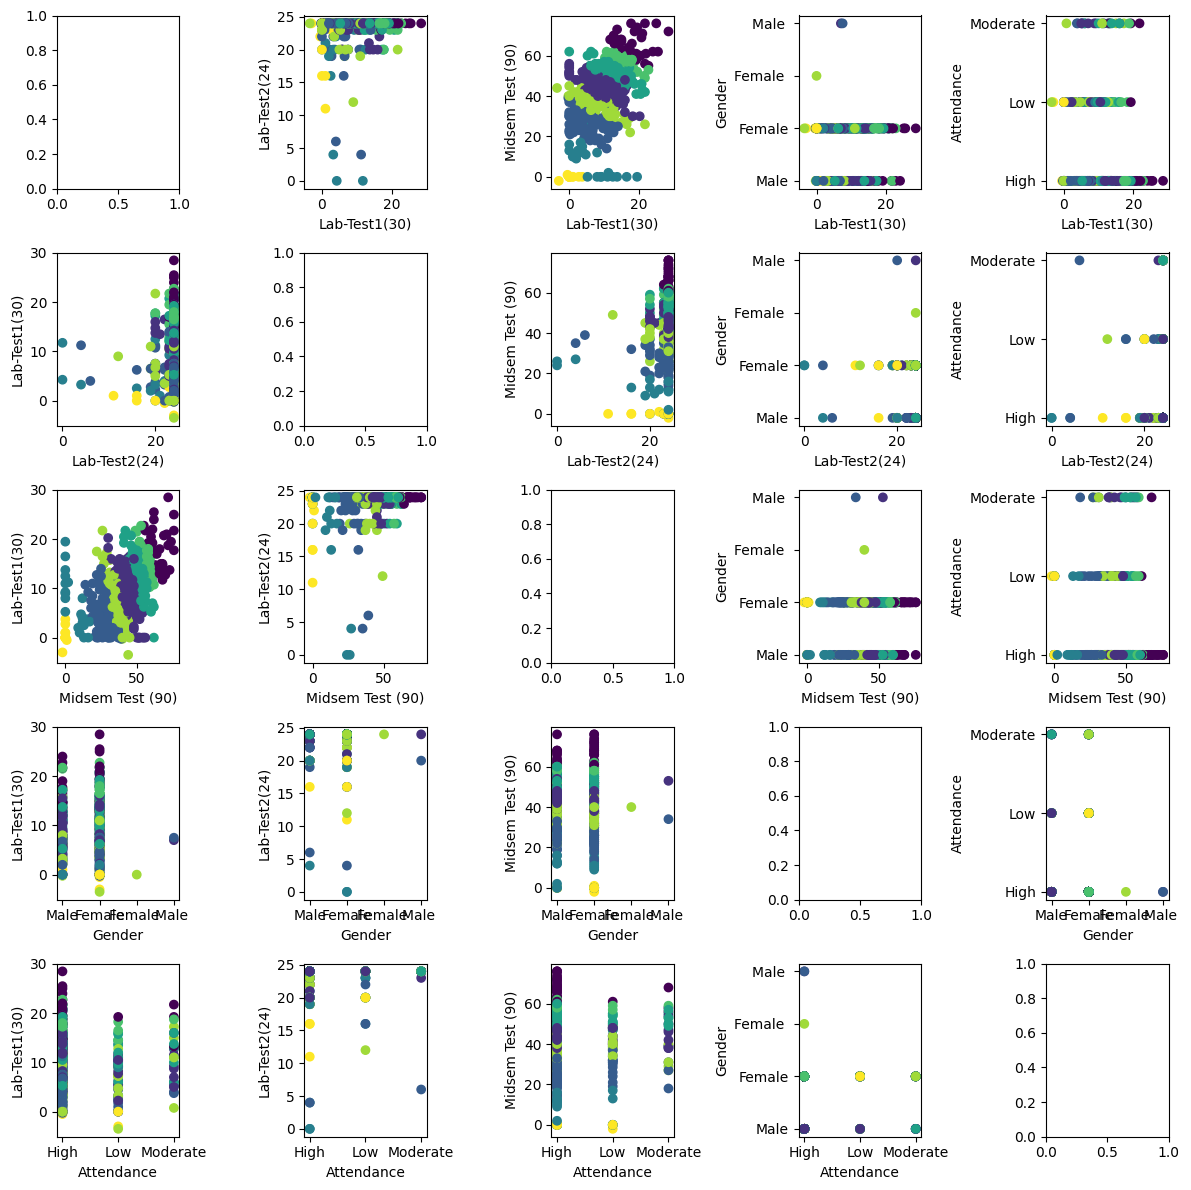

In [ ]:
#Additional Task (Scatter-Plot)
import matplotlib.pyplot as plt

# Extract features and target variable
features = data.drop(columns=['Grade'])
target = data['Grade']

# Create a scatter plot for each pair of features
num_features = len(features.columns)
fig, axs = plt.subplots(num_features, num_features, figsize=(12, 12))

for i, feature1 in enumerate(features.columns):
    for j, feature2 in enumerate(features.columns):
        if i != j:
            axs[i, j].scatter(features[feature1], features[feature2],c= target, cmap='viridis')
            axs[i, j].set_xlabel(feature1)
            axs[i, j].set_ylabel(feature2)

plt.tight_layout()
plt.show()


# **Task 2- Implementing Random Forest model**  

In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.3):
    """
    Splits a pandas DataFrame in two.
    """
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, test_ds_pd = split_dataset(data)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

351 examples in training, 149 examples for testing.


In [ ]:
from tensorflow_decision_forests.keras import pd_dataframe_to_tf_dataset

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=10, max_depth=16)
train_ds = pd_dataframe_to_tf_dataset(train_ds_pd,label="Grade")
test_ds = pd_dataframe_to_tf_dataset(test_ds_pd,label="Grade")
# Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp7rmqng0p as temporary training directory


Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Atten

[INFO 24-02-12 14:22:36.5852 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 14:22:36.5852 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 14:22:36.5852 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 14:22:36.5853 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 14:22:36.5853 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 14:22:36.5854 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 14:22:36.5855 UTC kernel.cc:792] Tra

Model trained in 0:00:00.091884
Compiling model...
Model compiled.


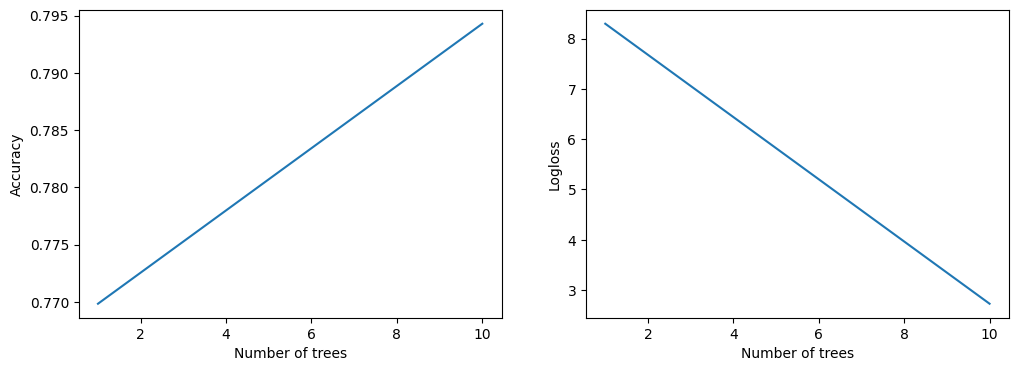

In [ ]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")

plt.show()

In [ ]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()
for name, value in evaluation.items():
    print(f" {name}: {value:.8f}")


1/1 [==============================] - 0s 373ms/step - loss: 0.0000e+00 - accuracy: 0.8389

 loss: 0.00000000
 accuracy: 0.83892620


In [ ]:
import tensorflow_decision_forests as tfdf

tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [ ]:
import tensorflow_decision_forests as tfdf

tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=1, max_depth=3)

# **Task 3- Comparing Gradient boosted decision trees with Random Forest**

In [ ]:
from tensorflow_decision_forests.keras import GradientBoostedTreesModel

# Specify the Random Forest model.
model_rf = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=30, max_depth=16)

# Specify the Gradient Boosted Decision Trees model.
model_gbdt = GradientBoostedTreesModel(verbose=2, categorical_algorithm="CART", use_hessian_gain=False, num_trees=30, max_depth=16)

# Train the Random Forest model.
model_rf.fit(train_ds)

# Train the Gradient Boosted Decision Trees model.
model_gbdt.fit(train_ds)


Use 2 thread(s) for training
Use /tmp/tmpa3l3n_sp as temporary training directory
Use 2 thread(s) for training
Use /tmp/tmp0i4yvb7u as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cas

[INFO 24-02-12 14:22:38.4433 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 14:22:38.4433 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 14:22:38.4433 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 14:22:38.4434 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 14:22:38.4434 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 14:22:38.4436 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 14:22:38.4436 UTC kernel.cc:792] Tra

Model trained in 0:00:00.132906
Compiling model...
Model compiled.
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>

[INFO 24-02-12 14:22:39.2105 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 14:22:39.2105 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 14:22:39.2105 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 14:22:39.2106 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 14:22:39.2107 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 14:22:39.2108 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 14:22:39.2108 UTC kernel.cc:792] Tra

Model trained in 0:00:01.639363
Compiling model...
Model compiled.


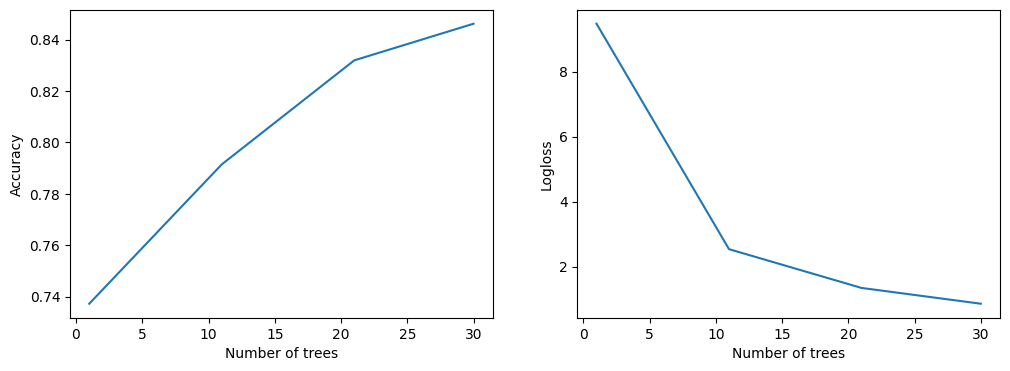

In [ ]:
logs = model_rf.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")

plt.show()

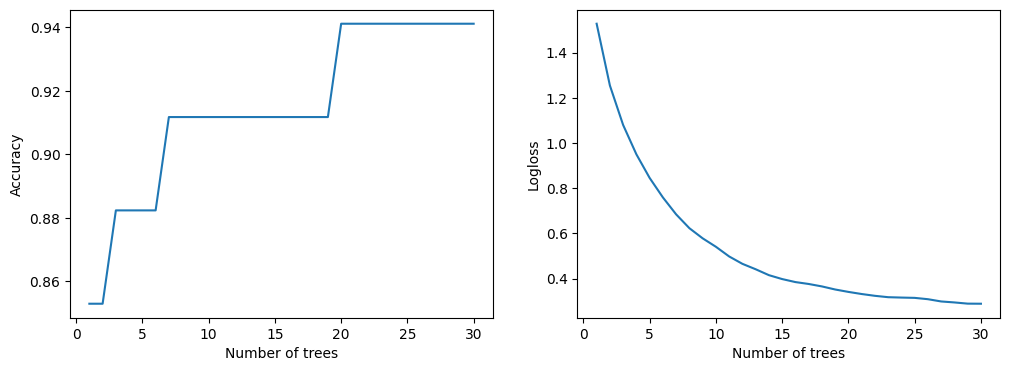

In [ ]:
logs = model_gbdt.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")

plt.show()

In [ ]:
model_rf.compile(metrics=["accuracy"])
evaluation = model_rf.evaluate(test_ds, return_dict=True)
print()
for name, value in evaluation.items():
    print(f" {name}: {value:.8f}")


1/1 [==============================] - 0s 260ms/step - loss: 0.0000e+00 - accuracy: 0.8658

 loss: 0.00000000
 accuracy: 0.86577183


In [ ]:
model_gbdt.compile(metrics=["accuracy"])
evaluation = model_gbdt.evaluate(test_ds, return_dict=True)
print()
for name, value in evaluation.items():
    print(f" {name}: {value:.8f}")


1/1 [==============================] - 0s 258ms/step - loss: 0.0000e+00 - accuracy: 0.8859

 loss: 0.00000000
 accuracy: 0.88590604


**Observations**-
For the following trained models the Hyperparameters used were-

Number of trees: 30, max depth= 16,
Algorithm used- CART
*   Testing Accuracy using Gradient boosted decision tree- 88.59%
*   Training Accuracy using Gradient boosted decision tree- 94.18%

*   Testing Accuracy using Random forest- 86.58%
*   Training Accuracy using Random forest- 84.61%

They have similar test accuracies but Gradient boosted DT gave a slightly better accuracy in our dataset.

**EXPLAINATION**- Gradient boosting trees can be more accurate than random forests. Because we train them to correct each other's errors, they're capable of capturing complex patterns in the data. However, if the data is noisy, the boosted trees may overfit and start modeling the noise(Doesn't appear to be a case of overfitting here as training and testing accuracies are in similar range).


# **Task 4- Hyperparameters Analysis for Random Forest Model**

In [ ]:
from sklearn.metrics import accuracy_score

# Define a range of hyperparameters to search over
n_trees_range = [2, 6, 10, 20, 35]
max_depth_range = [2, 4, 8, 16, 24]

results = pd.DataFrame(columns=['n_trees', 'max_depth', 'accuracy'])
results_t = pd.DataFrame(columns=['n_trees', 'max_depth', 'accuracy'])

for n_trees in n_trees_range:
    for max_depth in max_depth_range:
        # Specify the Random Forest model with the current hyperparameters
        model_rf_for_comp = tfdf.keras.RandomForestModel(num_trees=n_trees, max_depth=max_depth, verbose=2, categorical_algorithm="CART")

        # Train the model
        model_rf_for_comp.fit(train_ds)

        # Evaluate the model on the training and testing datasets
        model_rf_for_comp.compile(metrics=["accuracy"])
        evaluation = model_rf_for_comp.evaluate(train_ds, return_dict=True)
        print()
        # for name, value in evaluation.items():
        #     print(f" {name}: {value:.8f}")
        train_accuracy = evaluation["accuracy"]

        model_rf_for_comp.compile(metrics=["accuracy"])
        evaluation_t = model_rf_for_comp.evaluate(test_ds, return_dict=True)
        print()
        test_accuracy =evaluation_t["accuracy"]

        print(f"Number of Trees: {n_trees}, Max Depth: {max_depth}")
        print(f"Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")
        results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
        results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)



Use 2 thread(s) for training
Use /tmp/tmpa4vyxzq5 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-12 15:11:52.3004 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:11:52.3004 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:11:52.3005 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:11:52.3006 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:11:52.3006 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:11:52.3007 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:11:52.3008 UTC kernel.cc:792] Tra

Model trained in 0:00:00.113691
Compiling model...
Model compiled.
1/1 [==============================] - 0s 463ms/step - loss: 0.0000e+00 - accuracy: 0.4615

1/1 [==============================] - 1s 539ms/step - loss: 0.0000e+00 - accuracy: 0.3624

Number of Trees: 2, Max Depth: 2
Training Accuracy: 0.4615, Testing Accuracy: 0.3624
Use 2 thread(s) for training
Use /tmp/tmp16kll3s8 as temporary training directory
Reading training dataset...


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Attendance': SemanticTensor(seman

[INFO 24-02-12 15:11:55.4143 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:11:55.4143 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:11:55.4143 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:11:55.4144 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:11:55.4144 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:11:55.4146 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:11:55.4146 UTC kernel.cc:792] Tra

Model trained in 0:00:00.211472
Compiling model...
Model compiled.
1/1 [==============================] - 1s 998ms/step - loss: 0.0000e+00 - accuracy: 0.6125

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.4832

Number of Trees: 2, Max Depth: 4
Training Accuracy: 0.6125, Testing Accuracy: 0.4832
Use 2 thread(s) for training
Use /tmp/tmpvks8893i as temporary training directory
Reading training dataset...


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Attendance': SemanticTensor(seman

[INFO 24-02-12 15:11:59.2638 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:11:59.2639 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:11:59.2639 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:11:59.2640 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:11:59.2640 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:11:59.2641 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:11:59.2642 UTC kernel.cc:792] Tra

Model trained in 0:00:00.169153
Compiling model...
Model compiled.
1/1 [==============================] - 1s 642ms/step - loss: 0.0000e+00 - accuracy: 0.8490

1/1 [==============================] - 1s 558ms/step - loss: 0.0000e+00 - accuracy: 0.7450

Number of Trees: 2, Max Depth: 8
Training Accuracy: 0.8490, Testing Accuracy: 0.7450
Use 2 thread(s) for training
Use /tmp/tmpc73l044k as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Attendance': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>)}
Training dataset read in 0:00:00.470443. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:01.7439 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:01.7439 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:01.7439 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:01.7440 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:01.7440 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:01.7441 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:01.7442 UTC kernel.cc:792] Tra

Model trained in 0:00:00.094333
Compiling model...
Model compiled.
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.8604

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.7517

Number of Trees: 2, Max Depth: 16
Training Accuracy: 0.8604, Testing Accuracy: 0.7517
Use 2 thread(s) for training
Use /tmp/tmpgcih3083 as temporary training directory
Reading training dataset...


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Attendance': SemanticTensor(seman

[INFO 24-02-12 15:12:06.1189 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:06.1189 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:06.1190 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:06.1191 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:06.1191 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:06.1192 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:06.1193 UTC kernel.cc:792] Tra

Model trained in 0:00:00.130937
Compiling model...
Model compiled.
1/1 [==============================] - 1s 633ms/step - loss: 0.0000e+00 - accuracy: 0.8604

1/1 [==============================] - 1s 580ms/step - loss: 0.0000e+00 - accuracy: 0.7517

Number of Trees: 2, Max Depth: 24
Training Accuracy: 0.8604, Testing Accuracy: 0.7517
Use 2 thread(s) for training
Use /tmp/tmpm3v22afd as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Attendance': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>)}
Training dataset read in 0:00:00.441569. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:08.4569 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:08.4570 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:08.4570 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:08.4571 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:08.4571 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:08.4572 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:08.4573 UTC kernel.cc:792] Tra

Model trained in 0:00:00.054178
Compiling model...
Model compiled.
1/1 [==============================] - 1s 542ms/step - loss: 0.0000e+00 - accuracy: 0.4444

1/1 [==============================] - 1s 587ms/step - loss: 0.0000e+00 - accuracy: 0.3221

Number of Trees: 6, Max Depth: 2
Training Accuracy: 0.4444, Testing Accuracy: 0.3221
Use 2 thread(s) for training
Use /tmp/tmp1gbddopx as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Attendance': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>)}
Training dataset read in 0:00:00.414966. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:10.5309 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:10.5309 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:10.5309 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:10.5310 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:10.5311 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:10.5312 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:10.5312 UTC kernel.cc:792] Tra

Model trained in 0:00:00.128499
Compiling model...
Model compiled.
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.7322

1/1 [==============================] - 1s 855ms/step - loss: 0.0000e+00 - accuracy: 0.5839

Number of Trees: 6, Max Depth: 4
Training Accuracy: 0.7322, Testing Accuracy: 0.5839
Use 2 thread(s) for training
Use /tmp/tmpj8q35657 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.248395. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:13.6109 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:13.6109 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:13.6109 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:13.6111 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:13.6111 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:13.6112 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:13.6112 UTC kernel.cc:792] Tra

Model trained in 0:00:00.057097
Compiling model...
Model compiled.
1/1 [==============================] - 0s 274ms/step - loss: 0.0000e+00 - accuracy: 0.9231

1/1 [==============================] - 0s 266ms/step - loss: 0.0000e+00 - accuracy: 0.8188

Number of Trees: 6, Max Depth: 8
Training Accuracy: 0.9231, Testing Accuracy: 0.8188
Use 2 thread(s) for training
Use /tmp/tmpc62v5__8 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Ca

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.242752. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:14.6971 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:14.6971 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:14.6971 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:14.6972 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:14.6972 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:14.6973 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:14.6974 UTC kernel.cc:792] Tra

Model trained in 0:00:00.057886
Compiling model...
Model compiled.
1/1 [==============================] - 0s 270ms/step - loss: 0.0000e+00 - accuracy: 0.9288

1/1 [==============================] - 0s 269ms/step - loss: 0.0000e+00 - accuracy: 0.8255

Number of Trees: 6, Max Depth: 16
Training Accuracy: 0.9288, Testing Accuracy: 0.8255
Use 2 thread(s) for training
Use /tmp/tmpl6q5o9uf as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.244464. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:16.0433 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:16.0433 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:16.0434 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:16.0435 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:16.0435 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:16.0436 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:16.0437 UTC kernel.cc:792] Tra

Model trained in 0:00:00.065010
Compiling model...
Model compiled.
1/1 [==============================] - 0s 489ms/step - loss: 0.0000e+00 - accuracy: 0.9288

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.8255

Number of Trees: 6, Max Depth: 24
Training Accuracy: 0.9288, Testing Accuracy: 0.8255
Use 2 thread(s) for training
Use /tmp/tmp4_pfbdmm as temporary training directory
Reading training dataset...


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Attendance': SemanticTensor(seman

[INFO 24-02-12 15:12:19.1168 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:19.1168 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:19.1168 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:19.1170 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:19.1170 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:19.1171 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:19.1171 UTC kernel.cc:792] Tra

Model trained in 0:00:00.103484
Compiling model...
Model compiled.
1/1 [==============================] - 0s 252ms/step - loss: 0.0000e+00 - accuracy: 0.4444

1/1 [==============================] - 0s 266ms/step - loss: 0.0000e+00 - accuracy: 0.3221

Number of Trees: 10, Max Depth: 2
Training Accuracy: 0.4444, Testing Accuracy: 0.3221
Use 2 thread(s) for training
Use /tmp/tmpjkcy4bp3 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.280889. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:20.7201 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:20.7201 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:20.7201 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:20.7202 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:20.7202 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:20.7204 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:20.7204 UTC kernel.cc:792] Tra

Model trained in 0:00:00.069730
Compiling model...
Model compiled.
1/1 [==============================] - 0s 322ms/step - loss: 0.0000e+00 - accuracy: 0.7550

1/1 [==============================] - 0s 311ms/step - loss: 0.0000e+00 - accuracy: 0.6510

Number of Trees: 10, Max Depth: 4
Training Accuracy: 0.7550, Testing Accuracy: 0.6510
Use 2 thread(s) for training
Use /tmp/tmpki_u0u01 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.256241. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:21.9411 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:21.9411 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:21.9411 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:21.9412 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:21.9412 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:21.9413 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:21.9414 UTC kernel.cc:792] Tra

Model trained in 0:00:00.082515
Compiling model...
Model compiled.
1/1 [==============================] - 0s 271ms/step - loss: 0.0000e+00 - accuracy: 0.9288

1/1 [==============================] - 0s 254ms/step - loss: 0.0000e+00 - accuracy: 0.8255

Number of Trees: 10, Max Depth: 8
Training Accuracy: 0.9288, Testing Accuracy: 0.8255
Use 2 thread(s) for training
Use /tmp/tmpg5xmtd8r as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.242636. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:23.0653 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:23.0653 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:23.0654 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:23.0654 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:23.0654 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:23.0655 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:23.0656 UTC kernel.cc:792] Tra

Model trained in 0:00:00.091800
Compiling model...
Model compiled.
1/1 [==============================] - 0s 265ms/step - loss: 0.0000e+00 - accuracy: 0.9345

1/1 [==============================] - 0s 286ms/step - loss: 0.0000e+00 - accuracy: 0.8389

Number of Trees: 10, Max Depth: 16
Training Accuracy: 0.9345, Testing Accuracy: 0.8389
Use 2 thread(s) for training
Use /tmp/tmpg890y9r3 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor '

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.255186. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:24.1894 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:24.1895 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:24.1895 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:24.1896 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:24.1896 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:24.1897 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:24.1898 UTC kernel.cc:792] Tra

Model trained in 0:00:00.066031
Compiling model...
Model compiled.
1/1 [==============================] - 0s 268ms/step - loss: 0.0000e+00 - accuracy: 0.9345

1/1 [==============================] - 0s 258ms/step - loss: 0.0000e+00 - accuracy: 0.8389

Number of Trees: 10, Max Depth: 24
Training Accuracy: 0.9345, Testing Accuracy: 0.8389
Use 2 thread(s) for training
Use /tmp/tmp4qsl18_z as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor '

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.250494. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:25.3346 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:25.3346 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:25.3346 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:25.3347 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:25.3347 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:25.3349 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:25.3350 UTC kernel.cc:792] Tra

Model trained in 0:00:00.049818
Compiling model...
Model compiled.
1/1 [==============================] - 0s 261ms/step - loss: 0.0000e+00 - accuracy: 0.4217

1/1 [==============================] - 0s 261ms/step - loss: 0.0000e+00 - accuracy: 0.3154

Number of Trees: 20, Max Depth: 2
Training Accuracy: 0.4217, Testing Accuracy: 0.3154
Use 2 thread(s) for training
Use /tmp/tmp0rnukd52 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.251804. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:26.5176 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:26.5176 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:26.5176 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:26.5178 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:26.5178 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:26.5179 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:26.5180 UTC kernel.cc:792] Tra

Model trained in 0:00:00.073917
Compiling model...
Model compiled.
1/1 [==============================] - 0s 261ms/step - loss: 0.0000e+00 - accuracy: 0.7692

1/1 [==============================] - 0s 263ms/step - loss: 0.0000e+00 - accuracy: 0.6980

Number of Trees: 20, Max Depth: 4
Training Accuracy: 0.7692, Testing Accuracy: 0.6980
Use 2 thread(s) for training
Use /tmp/tmprhnmxw8a as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.261137. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:27.6005 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:27.6005 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:27.6005 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:27.6006 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:27.6006 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:27.6007 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:27.6008 UTC kernel.cc:792] Tra

Model trained in 0:00:00.081045
Compiling model...
Model compiled.
1/1 [==============================] - 0s 262ms/step - loss: 0.0000e+00 - accuracy: 0.9316

1/1 [==============================] - 0s 258ms/step - loss: 0.0000e+00 - accuracy: 0.8456

Number of Trees: 20, Max Depth: 8
Training Accuracy: 0.9316, Testing Accuracy: 0.8456
Use 2 thread(s) for training
Use /tmp/tmpjxxwhlxb as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.269433. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:28.8157 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:28.8157 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:28.8158 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:28.8159 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:28.8159 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:28.8160 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:28.8161 UTC kernel.cc:792] Tra

Model trained in 0:00:00.095048
Compiling model...
Model compiled.
1/1 [==============================] - 0s 407ms/step - loss: 0.0000e+00 - accuracy: 0.9544

1/1 [==============================] - 0s 404ms/step - loss: 0.0000e+00 - accuracy: 0.8591

Number of Trees: 20, Max Depth: 16
Training Accuracy: 0.9544, Testing Accuracy: 0.8591
Use 2 thread(s) for training
Use /tmp/tmpx4gnm9o5 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Attendance': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>)}
Training dataset read in 0:00:00.387296. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:30.4592 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:30.4592 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:30.4592 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:30.4594 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:30.4594 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:30.4595 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:30.4595 UTC kernel.cc:792] Tra

Model trained in 0:00:00.130698
Compiling model...
Model compiled.
1/1 [==============================] - 0s 417ms/step - loss: 0.0000e+00 - accuracy: 0.9544

1/1 [==============================] - 0s 264ms/step - loss: 0.0000e+00 - accuracy: 0.8591

Number of Trees: 20, Max Depth: 24
Training Accuracy: 0.9544, Testing Accuracy: 0.8591
Use 2 thread(s) for training
Use /tmp/tmplegxvzru as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor '

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.278944. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:31.9625 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:31.9625 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:31.9625 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:31.9626 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:31.9627 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:31.9627 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:31.9628 UTC kernel.cc:792] Tra

Model trained in 0:00:00.067145
Compiling model...
Model compiled.
1/1 [==============================] - 0s 325ms/step - loss: 0.0000e+00 - accuracy: 0.4444

1/1 [==============================] - 0s 282ms/step - loss: 0.0000e+00 - accuracy: 0.3221

Number of Trees: 35, Max Depth: 2
Training Accuracy: 0.4444, Testing Accuracy: 0.3221
Use 2 thread(s) for training
Use /tmp/tmp15hzkcpz as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.245582. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:33.1089 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:33.1089 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:33.1089 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:33.1090 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:33.1090 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:33.1092 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:33.1092 UTC kernel.cc:792] Tra

Model trained in 0:00:00.070801
Compiling model...
Model compiled.
1/1 [==============================] - 0s 264ms/step - loss: 0.0000e+00 - accuracy: 0.7749

1/1 [==============================] - 0s 269ms/step - loss: 0.0000e+00 - accuracy: 0.6644

Number of Trees: 35, Max Depth: 4
Training Accuracy: 0.7749, Testing Accuracy: 0.6644
Use 2 thread(s) for training
Use /tmp/tmp1ctl0b88 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.257874. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:34.2329 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:34.2329 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:34.2329 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:34.2330 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:34.2330 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:34.2332 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:34.2332 UTC kernel.cc:792] Tra

Model trained in 0:00:00.091225
Compiling model...
Model compiled.
1/1 [==============================] - 0s 256ms/step - loss: 0.0000e+00 - accuracy: 0.9487

1/1 [==============================] - 0s 277ms/step - loss: 0.0000e+00 - accuracy: 0.8591

Number of Trees: 35, Max Depth: 8
Training Accuracy: 0.9487, Testing Accuracy: 0.8591
Use 2 thread(s) for training
Use /tmp/tmplbml4obv as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.248763. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:35.3849 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:35.3849 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:35.3849 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:35.3850 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:35.3850 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:35.3852 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:35.3852 UTC kernel.cc:792] Tra

Model trained in 0:00:00.111033
Compiling model...
Model compiled.
1/1 [==============================] - 1s 589ms/step - loss: 0.0000e+00 - accuracy: 0.9459

1/1 [==============================] - 0s 270ms/step - loss: 0.0000e+00 - accuracy: 0.8591

Number of Trees: 35, Max Depth: 16
Training Accuracy: 0.9459, Testing Accuracy: 0.8591
Use 2 thread(s) for training
Use /tmp/tmpcx3e3w40 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor '

<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


Training dataset read in 0:00:00.282411. Found 351 examples.
Training model...


[INFO 24-02-12 15:12:36.9092 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 15:12:36.9092 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 15:12:36.9092 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 15:12:36.9093 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 15:12:36.9093 UTC kernel.cc:392] Number of examples: 351
[INFO 24-02-12 15:12:36.9094 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-12 15:12:36.9095 UTC kernel.cc:792] Tra

Model trained in 0:00:00.110140
Compiling model...


[INFO 24-02-12 15:12:37.0070 UTC decision_forest.cc:660] Model loaded with 35 root(s), 2217 node(s), and 5 input feature(s).
[INFO 24-02-12 15:12:37.0071 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 263ms/step - loss: 0.0000e+00 - accuracy: 0.9459

1/1 [==============================] - 0s 288ms/step - loss: 0.0000e+00 - accuracy: 0.8591

Number of Trees: 35, Max Depth: 24
Training Accuracy: 0.9459, Testing Accuracy: 0.8591


<ipython-input-117-c9705e40893c>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': test_accuracy}, ignore_index=True)
<ipython-input-117-c9705e40893c>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_t = results_t.append({'n_trees': n_trees, 'max_depth': max_depth, 'accuracy': train_accuracy}, ignore_index=True)


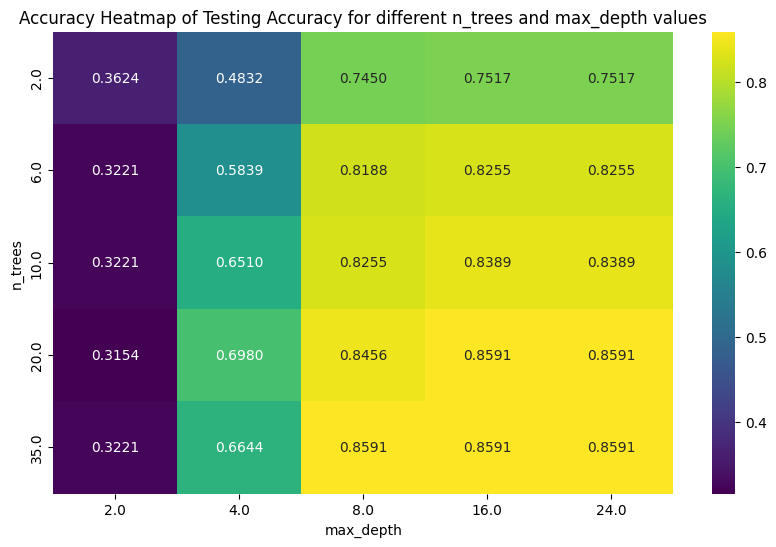

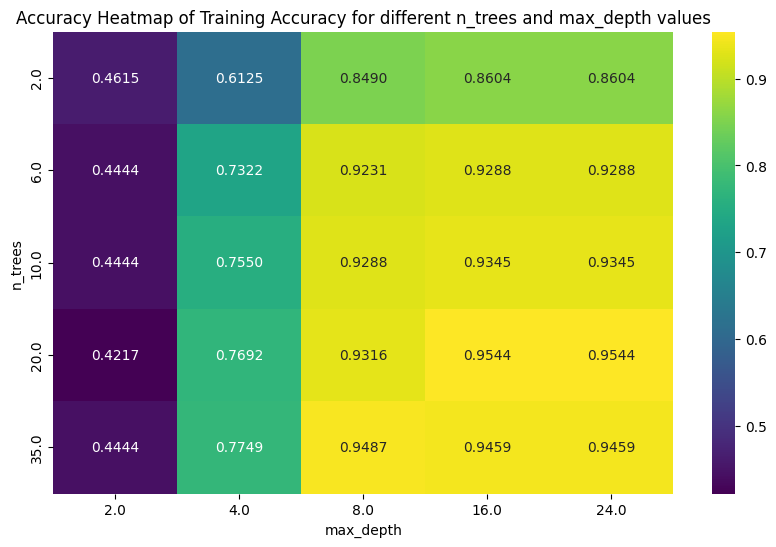

In [ ]:
heatmap_data = results.pivot(index='n_trees', columns='max_depth', values='accuracy')
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.4f', cbar=True)
plt.title('Accuracy Heatmap of Testing Accuracy for different n_trees and max_depth values')
plt.show()

heatmap_data2 = results_t.pivot(index='n_trees', columns='max_depth', values='accuracy')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data2, annot=True, cmap='viridis', fmt='.4f', cbar=True)
plt.title('Accuracy Heatmap of Training Accuracy for different n_trees and max_depth values')
plt.show()


**Observations:-**

Based on the above heatmap, we can see that for almost all (n_tree, max_depth) pair value the difference of training and testing accuracies is similar.

We can also observe that:

1. Number of trees- For most of our cases, increasing this hyperparameter leads to better accuracy because even if few models are giving bad results then there share in decision making is reduced( this is concept of Bagging).

2. Max_depth- To a certain extent the accuracies increases with increase in depth but after one point it remains either constant(i.e. no longer bifurcations) or decreases(ie Overfitting) as observed in above cases.

**Best Case in our analysis**-

Hyperparameters used-Number of Trees: 35, Max Depth: 8

Testing Accuracy for best case: 0.8591
